## Predicting Customer response to Personal Loan Ad-Campaign

#### Dataset
The dataset is available at <strong>"data/personal_loan.csv"</strong> in the respective challenge's repo.<br>
Original Dataset : https://www.kaggle.com/itsmesunil/bank-loan-modelling

#### Features (X)
1. Age - Customer's age in completed years. (Numeric)
2. Experience - No. of years of professional experience (Numeric)
3. Income - Annual income of the customer. (Numeric)
4. ZIPCode - Home Address ZIP code. (Numeric)
5. Family - Family size of the customer. (Numeric)
6. CCAvg Avg. - Spending on credit cards per month (Numeric)
7. Education  - 
    - Education Level (Categorical|Multiclass):
        - 1: Undergrad
        - 2: Graduate
        - 3: Advanced/Professional 
8. Mortgage - Value of house mortgage if any. (Numeric)
9. Securities Account - Does the customer have a securities account with the bank? (Categorical | Binary)
10. CD Account - Does the customer have a certificate of deposit (CD) account with the bank? (Categorical | Binary)
11. Online - Does the customer use internet banking facilities? (Categorical | Binary)
12. CreditCard - Does the customer uses a credit card issued by UniversalBank? (Categorical | Binary)

#### Target (y)
- Personal Loan : Did this customer accept the personal loan offered in the last campaign? (Binary)

#### Objective
- To apply Logistic Regression and Decision Tree Algorithms on the given imbalanced dataset. and compare the algorithms used on our dataset on the basis of appropriately used evaluated metrics while presenting a summarized analysis of what you find.

#### Tasks
- Download and load the data (csv file).
- Process the data according to guidelines given in the comments of the respective cells.
- Split the dataset into 80% for training and rest 20% for testing. (sklearn.model_selection.train_test_split function).
- Initialize Logistic Regression and Decision Tree Models (With parameters given in the cell).
- Train the models on the same dataset.
- Compute the confusion matrix for both models and compare.
- Compute a classification report (Precision, Recall and F-1 score) for both models and compare. 
- Compute and plot the ROC Curve of both curves and simultaneously compute the ROC-AUC for both models and thereby compare.
- Summarize your findings and give reasoning for your results (comparing task_1 and task_2).

#### Further Fun (will not be evaluated)
- Train model on different train-test splits such as 60-40, 50-50, 70-30, 80-20, 90-10, 95-5 etc. and observe accuracies on both X_train and X_test.
- Shuffle training samples with different random seed values in the train_test_split function. Check the model error for the testing data for each setup.
- Explore ways to deal with imbalanced dataset. Use different methods (such as eliminating outliers and such) to experiment with the given dataset.

#### Helpful links
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Differences between Logistic Regression and a Decision Tree: https://www.geeksforgeeks.org/ml-logistic-regression-v-s-decision-tree-classification/
- When are Decision Trees better than Logistic Regression?: https://www.displayr.com/decision-trees-are-usually-better-than-logistic-regression
- How to choose between Logistic Regression and Decision Trees given a dataset: https://datascience.stackexchange.com/questions/6048/should-i-use-a-decision-tree-or-logistic-regression-for-classification
- Decision Tree Classifier by Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Understanding classification metrics like Precision, Recall, F-Scores and Confusion matrices: https://nillsf.com/index.php/2020/05/23/confusion-matrix-accuracy-recall-precision-false-positive-rate-and-f-scores-explained/
- Understanding the ROC Curve: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [18]:
# Read the data from local cloud directory
data = pd.read_csv('data/personal_loan.csv')

In [19]:
# Print the dataframe rows just to see some samples
cols = list(data.columns)
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,CreditCard,Securities Account,CD Account,Online,Personal Loan
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,1,0,0,0,0


In [4]:
# Print shape of the dataframe
data.shape

(5000, 13)

In [5]:
# Take a look at the distribution of target variable (Below is an example of what we mean)
print(data['Personal Loan'].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64


### This is an imbalanced dataset, as shown above

In [6]:
# Print info about dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   CreditCard          5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB
None


In [7]:
# Fill Missing Values (if any)
data.isna().sum()
# we can observe there are no missing values.

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
CreditCard            0
Securities Account    0
CD Account            0
Online                0
Personal Loan         0
dtype: int64

In [14]:
# Label Encode Categorical Columns (if required)
data.select_dtypes(exclude = ['number']).columns
# we can observe that there are no categorical columns

Index([], dtype='object')

In [20]:
# Normalize/Standardize numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns = cols)
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,CreditCard,Securities Account,CD Account,Online,Personal Loan
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
# Define Feature Columns as X and Target Column as y
X = data.drop('Personal Loan', axis = 1).values
y = data['Personal Loan'].values

In [23]:
print(X.shape)
print(y.shape)

(5000, 12)
(5000,)


In [24]:
# Do train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4000, 12)
(4000,)
(1000, 12)
(1000,)


### Logistic Regression Model

In [26]:
# Initializing the model
log_reg = LogisticRegression()

In [27]:
# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Make Predictions on the test data (log_prob values represents raw probabilities of predictions)
# It will be used for ROC Curves
log_pred = log_reg.predict(X_test)
log_prob = log_reg.predict_proba(X_test)

In [36]:
print(log_pred[0])
print(log_prob[0])

print(log_pred[-1])
print(log_prob[-1])

0.0
[9.99252415e-01 7.47584847e-04]
0.0
[0.99759365 0.00240635]


### Decision Tree Model

In [37]:
# Initializing the model
d_tree = DecisionTreeClassifier()

In [38]:
# Train the model
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# Make Predictions on the test data (dt_prob values represents raw probabilities of predictions)
# It will be used for ROC Curves
dt_pred = d_tree.predict(X_test)
dt_prob = d_tree.predict_proba(X_test)

## Evaluating Our Models

In [40]:
# Confusion matrix for Logistic Regression Model
print(confusion_matrix(y_test, log_pred))

[[889   6]
 [ 39  66]]


In [41]:
# Confusion matrix for Decision Tree Model
print(confusion_matrix(y_test, dt_pred))

[[888   7]
 [  8  97]]


### <b>Think</b> : Would accuracy_score be a good evaluation metric, given that the dataset is imbalanced?

In [43]:
# Since the dataset is imbalanced, we evaluate our model using F1-Score
# F1-Score for Logistic Regression Model
print(f1_score(y_test, log_pred)) 

0.7457627118644068


In [44]:
# F1-Score for Decision Tree Model
print(f1_score(y_test, dt_pred))

0.9282296650717704


In [45]:
# Classification report for Logistic Regression Model
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       895
         1.0       0.92      0.63      0.75       105

    accuracy                           0.95      1000
   macro avg       0.94      0.81      0.86      1000
weighted avg       0.95      0.95      0.95      1000



In [46]:
# Classification report for Decision Tree Model
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       895
         1.0       0.93      0.92      0.93       105

    accuracy                           0.98      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.98      0.98      0.98      1000



### Plotting the ROC Curve and computing the ROC-AUC

In [47]:
#ROC-AUC curve is a performance measurement for classification problems at various thresholds settings.
#Calculate False Positive Rate and True Positive Rate for y_test
fpr1, tpr1, thresh1 = roc_curve(y_test, log_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, dt_pred, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

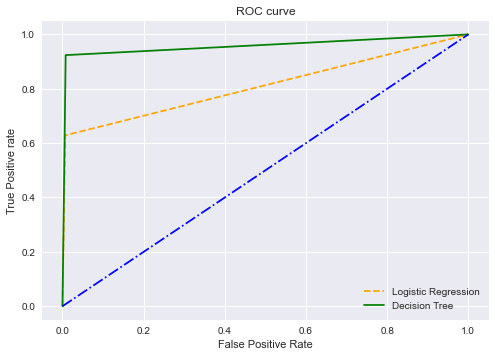

In [48]:
#Plot ROC Curve (TPR vs FPR)
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='-.', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

In [49]:
#Print ROC-AUC scores for both models
auc_score1 = roc_auc_score(y_test, log_pred)
auc_score2 = roc_auc_score(y_test, dt_pred)

print("ROC-AUC Score for Logistic Regression: ",auc_score1)
print("ROC-AUC Score for Decision Tree: ",auc_score2)

ROC-AUC Score for Logistic Regression:  0.8109337589784517
ROC-AUC Score for Decision Tree:  0.9579941473796223


## Conclusive Analysis

Summarize your findings and give reasoning for the results you obtained from task_1 and task_2 and compare the algorithms utilized based on the evaluations metrics used.

In [ ]:
Whenever we have more categorical terms we find that DT works better than Log Reg. Contrary to this, whenever the number of
numerical features are more we observe that decision tree works better.

Also according to me, since we are putting any constraints on the DT it tends to over fit the data.

